<center><h1>FINAL PROJECT</h1></center>
<center><h2>Emily Smith & Miranda Martone</h2></center> 
_________________________________________________________________________________________________________________________________________

## Loading Packages & Data

In [2]:
#Loading the readr and dplyr packages
library(readr)
library(dplyr)

#Loading our two data files (csv's)
df_abort <- read_csv("final_abortion_1.csv")
df_sm <- read_csv("final_single_mothers.csv")

#Using "head" to view the first 6 rows of our data
head(df_sm)
head(df_abort)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Parsed with column specification:
cols(
  .default = col_double(),
  states = col_character(),
  `effective date` = col_character(),
  `valid through date` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  states = col_character(),
  percentage_single_mothers = col_double()
)


states,percentage_single_mothers
<chr>,<dbl>
Louisiana,11.67
Mississippi,11.30
New Mexico,9.69
North Carolina,9.53
Georgia,9.51
South Carolina,8.94


states,effective date,valid through date,ban_type,ban_time,prohibit_when_12 weeks postfertilization (14 weeks lmp),prohibit_when_13 weeks postfertilization (15 weeks lmp),prohibit_when_18 weeks postfertilization (20 weeks lmp),prohibit_when20 weeks postfertilization (22 weeks lmp),prohibit_when_22 weeks postfertilization (24 weeks lmp),⋯,methods_procedpartial-birth abortions,methods_proceddismemberment abortions,methods_proced_saline method abortions,methods_exclife endangerment,methods_excserious health risk,methods_exc_fetal anomaly,methods_exc_no exceptions,limited_law,limited_court,limited_ag
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,10/26/2017,12/1/2018,1,1,0,0,0,1,0,⋯,1,1,0,1,1,0,0,1,1,0
Alaska,7/19/2017,12/1/2018,1,0,3,3,3,3,3,⋯,1,0,0,0,0,0,1,0,0,0
Arizona,8/9/2017,12/1/2018,1,1,0,0,1,0,0,⋯,1,0,0,1,0,0,0,1,1,0
Arkansas,1/1/2018,12/1/2018,1,1,1,0,0,0,0,⋯,1,1,0,1,0,0,0,1,1,0
California,1/1/2014,12/1/2018,1,1,0,0,0,0,0,⋯,3,3,3,3,3,3,3,0,0,0
Colorado,12/1/2018,12/1/2018,0,0,3,3,3,3,3,⋯,3,3,3,3,3,3,3,0,0,0


## Creating our dataframe

In [3]:
#Creating a new dataframe by joining our data based on "states"
df_joined <- df_abort %>% right_join(df_sm, by=c("states"))
head(df_joined)

states,effective date,valid through date,ban_type,ban_time,prohibit_when_12 weeks postfertilization (14 weeks lmp),prohibit_when_13 weeks postfertilization (15 weeks lmp),prohibit_when_18 weeks postfertilization (20 weeks lmp),prohibit_when20 weeks postfertilization (22 weeks lmp),prohibit_when_22 weeks postfertilization (24 weeks lmp),⋯,methods_proceddismemberment abortions,methods_proced_saline method abortions,methods_exclife endangerment,methods_excserious health risk,methods_exc_fetal anomaly,methods_exc_no exceptions,limited_law,limited_court,limited_ag,percentage_single_mothers
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,5/23/2018,12/1/2018,1,1,0,0,0,1,0,⋯,1,0,1,1,0,0,1,1,0,11.67
Mississippi,11/20/2018,12/1/2018,1,1,0,1,0,0,0,⋯,1,0,1,1,0,0,1,1,0,11.30
New Mexico,5/17/2000,12/1/2018,1,0,3,3,3,3,3,⋯,0,0,1,1,0,0,0,0,0,9.69
North Carolina,10/1/2015,12/1/2018,1,1,0,0,0,1,0,⋯,3,3,3,3,3,3,0,0,0,9.53
Georgia,5/9/2017,12/1/2018,1,1,0,0,0,1,0,⋯,0,0,1,0,0,0,0,0,0,9.51
South Carolina,5/25/2016,12/1/2018,1,1,0,0,0,1,0,⋯,0,0,1,1,0,0,0,0,0,8.94


In [4]:
#Creating a subset of our full dataframe that only includes the columns we need
df_final <- unique(df_joined[, c("states", "ban_type", "ban_time","ban_reason", "ban_method", "percentage_single_mothers")])
head(df_final)

states,ban_type,ban_time,ban_reason,ban_method,percentage_single_mothers
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,1,1,1,1,11.67
Mississippi,1,1,0,1,11.30
New Mexico,1,0,0,1,9.69
North Carolina,1,1,1,0,9.53
Georgia,1,1,0,1,9.51
South Carolina,1,1,0,1,8.94


## Running an individual test for time-specific abortion bans

In [6]:
#Reshaping our data by filtering for whether or not there is a time-specific abortion ban
time_y <- df_final  %>%
    filter(ban_time == "1")

time_n <- df_final  %>%
    filter(ban_time == "0")

#Running t-test to determine if there is a statistically significant relaitonship between the following
#State legilstion with a time-specific abortion ban and the percentage of single mothers
t_test_time <- t.test(time_y$percentage_single_mothers, time_n$percentage_single_mothers)
t_test_time


	Welch Two Sample t-test

data:  time_y$percentage_single_mothers and time_n$percentage_single_mothers
t = 1.2218, df = 17.468, p-value = 0.238
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3690924  1.3896778
sample estimates:
mean of x mean of y 
 7.358293  6.848000 


## Running an individual test for reason-specific abortion bans

In [7]:
#Reshaping our data by filtering for whether or not there is a reason-specific abortion ban
reason_y <- df_final  %>%
    filter(ban_reason == "1")

reason_n <- df_final  %>%
    filter(ban_reason == "0")

#Running t-test to determine if there is a statistically significant relaitonship between the following
#State legilstion with a reason-specific abortion ban and the percentage of single mothers
t_test_reason <- t.test(reason_y$percentage_single_mothers, reason_n$percentage_single_mothers)
t_test_reason


	Welch Two Sample t-test

data:  reason_y$percentage_single_mothers and reason_n$percentage_single_mothers
t = 1.4802, df = 16.16, p-value = 0.1581
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3171247  1.7885349
sample estimates:
mean of x mean of y 
 7.820833  7.085128 


## Running an individual test for method-specific abortion bans

In [8]:
#Reshaping our data by filtering for whether or not there is a method-specific abortion ban
method_y <- df_final  %>%
    filter(ban_method == "1")

method_n <- df_final  %>%
    filter(ban_method == "0")

#Running t-test to determine if there is a statistically significant relaitonship between the following
#State legilstion with a method-specific abortion ban and the percentage of single mothers
t_test_method <- t.test(method_y$percentage_single_mothers, method_n$percentage_single_mothers)
t_test_method


	Welch Two Sample t-test

data:  method_y$percentage_single_mothers and method_n$percentage_single_mothers
t = 0.91276, df = 48.637, p-value = 0.3659
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3899389  1.0387268
sample estimates:
mean of x mean of y 
 7.372727  7.048333 


## Creating the "ban severity scale"

In [9]:
#This adds all of the individual legislation into one metric on the severity of abortion legislation
#This metric is a scale from 0 to 4

#Creating a function for the abortion ban scale to add all of the individual legislation into one metric
sum_columns <- function(p, a, u, l){
    n <- length(p)
    res <- rep(0, n)
    
    for(i in 1:n){
        res[i] <- sum(p[i], a[i], u[i], l[i])
}
    return(res)
}

#Creating a new column and applying our function to it
df_final$ban_scale <- sum_columns(df_final$"ban_type", df_final$"ban_time", df_final$"ban_reason", df_final$"ban_method")

#Examining our data
head(df_final)
summary(df_final)
df_final

states,ban_type,ban_time,ban_reason,ban_method,percentage_single_mothers,ban_scale
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,1,1,1,1,11.67,4
Mississippi,1,1,0,1,11.30,3
New Mexico,1,0,0,1,9.69,2
North Carolina,1,1,1,0,9.53,3
Georgia,1,1,0,1,9.51,3
South Carolina,1,1,0,1,8.94,3


    states             ban_type         ban_time        ban_reason    
 Length:52          Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:1.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Mode  :character   Median :1.0000   Median :1.0000   Median :0.0000  
                    Mean   :0.8824   Mean   :0.8039   Mean   :0.2353  
                    3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
                    Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                    NA's   :1        NA's   :1        NA's   :1       
   ban_method     percentage_single_mothers   ban_scale    
 Min.   :0.0000   Min.   : 4.780            Min.   :0.000  
 1st Qu.:0.0000   1st Qu.: 6.425            1st Qu.:2.000  
 Median :1.0000   Median : 7.120            Median :3.000  
 Mean   :0.6471   Mean   : 7.263            Mean   :2.569  
 3rd Qu.:1.0000   3rd Qu.: 7.803            3rd Qu.:3.000  
 Max.   :1.0000   Max.   :11.670            Max.   :4.000  
 NA's   :1  

states,ban_type,ban_time,ban_reason,ban_method,percentage_single_mothers,ban_scale
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Louisiana,1,1,1,1,11.67,4
Mississippi,1,1,0,1,11.30,3
New Mexico,1,0,0,1,9.69,2
North Carolina,1,1,1,0,9.53,3
Georgia,1,1,0,1,9.51,3
South Carolina,1,1,0,1,8.94,3
Oklahoma,1,1,1,1,8.63,4
Rhode Island,1,1,0,1,8.28,3
Texas,1,1,0,1,8.25,3


## Testing our ban scale in order to direct our research

In [10]:
#Reshaping our data by filtering for states by the most severe and least severe legislation
harsh1 <- df_final  %>%
    filter(ban_scale == "4")

weak1 <- df_final  %>%
    filter(ban_scale == "0")

#Running a t-test
t_test_scale1 <- t.test(harsh1$percentage_single_mothers, weak1$percentage_single_mothers)
t_test_scale1


	Welch Two Sample t-test

data:  harsh1$percentage_single_mothers and weak1$percentage_single_mothers
t = 2.0691, df = 11.336, p-value = 0.06213
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06767514  2.32634181
sample estimates:
mean of x mean of y 
 7.641000  6.511667 


In [11]:
#Reshaping our data by filtering for states by the second-most severe and least severe legislation
#This is because there is a larger sample size of states with a severity level of 3 
harsh2 <- df_final  %>%
    filter(ban_scale == "3")

weak2 <- df_final  %>%
    filter(ban_scale == "0")

#Running a t-test
t_test_scale2 <- t.test(harsh2$percentage_single_mothers, weak2$percentage_single_mothers)
t_test_scale2


	Welch Two Sample t-test

data:  harsh2$percentage_single_mothers and weak2$percentage_single_mothers
t = 2.1236, df = 24.911, p-value = 0.04381
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02595723 1.70499515
sample estimates:
mean of x mean of y 
 7.377143  6.511667 


## Running a t-test for any type of abortion ban

In [5]:
#Reshaping our data by filtering for whether or not there is a ban on abortion type 
type_y <- df_final  %>%
    filter(ban_type == "1")

type_n <- df_final  %>%
    filter(ban_type == "0")

#Running t-test to determine if there is a statistically significant relaitonship between the following
#State legilstion banning certain abortion types and the percentage of single mothers
t_test_type <- t.test(type_y$percentage_single_mothers, type_n$percentage_single_mothers)
t_test_type


	Welch Two Sample t-test

data:  type_y$percentage_single_mothers and type_n$percentage_single_mothers
t = 2.917, df = 21.662, p-value = 0.00807
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.244017 1.448205
sample estimates:
mean of x mean of y 
 7.357778  6.511667 


## Running a t-test for any of the four bans (type, time, reason, & method)

In [12]:
#Reshaping our data by filtering for states with any bans on abortion vs states with no legislative bans
#This is our full sample size of 50 
harsh3 <- df_final  %>%
    filter(ban_scale == "4" || ban_scale == "3" || ban_scale == "2" || ban_scale == "1")

weak3 <- df_final  %>%
    filter(ban_scale == "0")

#Running a t-test
t_test_scale3 <- t.test(harsh3$percentage_single_mothers, weak3$percentage_single_mothers)
t_test_scale3


	Welch Two Sample t-test

data:  harsh3$percentage_single_mothers and weak3$percentage_single_mothers
t = 2.7601, df = 18.103, p-value = 0.01284
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.179688 1.323133
sample estimates:
mean of x mean of y 
 7.263077  6.511667 


## Running a Linear Regression

In [13]:
#Loading broom
library(broom)

#Running a linear regression
paul_lm<- lm(df_final$percentage_single_mothers ~ df_final$ban_scale)

#Examining the results of our test
tidy(paul_lm)
glance(paul_lm)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),6.5417029,0.4678129,13.98359,9.914526e-19
df_final$ban_scale,0.2789554,0.1660083,1.68037,9.925054e-02


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.05448563,0.03518942,1.374061,2.823644,0.09925054,2,-87.55204,181.1041,186.8996,92.51418,49


## Installing Loading Lavaan

In [14]:
#Installing Lavaan
install.packages("lavaan", dependencies=TRUE)

#Loading Lavaan
library(lavaan)

also installing the dependencies ‘mnormt’, ‘pbivnorm’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
This is lavaan 0.6-5
lavaan is BETA software! Please report any bugs.


## Running a Confirmatory Factor Analysis

In [15]:
#Running a CFA
paul_model <- 'severity =~ ban_type + ban_time + ban_reason + ban_method'
fit1 <- cfa(paul_model, data=df_final, likelihood = "wishart")

#Examining the results of our CFA
summary(fit1, fit.measures = TRUE)

Warning message in lav_object_post_check(object):
“lavaan WARNING: some estimated ov variances are negative”

lavaan 0.6-5 ended normally after 24 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                          8
                                                      
                                                  Used       Total
  Number of observations                            51          52
                                                                  
Model Test User Model:
                                                      
  Test statistic                                 4.768
  Degrees of freedom                                 2
  P-value (Chi-square)                           0.092

Model Test Baseline Model:

  Test statistic                                60.891
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.950
  

## Running a Structural Equation Model

In [16]:
#Running a SEM
stey_model <- 'severity =~ ban_type + ban_time + ban_reason + ban_method
    percentage_single_mothers ~ severity'
fit2 <- sem(stey_model, data=df_final)

#Examining the results of our SEM
summary(fit2, fit.measures = TRUE)

Warning message in lav_object_post_check(object):
“lavaan WARNING: some estimated ov variances are negative”

lavaan 0.6-5 ended normally after 29 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         10
                                                      
                                                  Used       Total
  Number of observations                            51          52
                                                                  
Model Test User Model:
                                                      
  Test statistic                                 7.076
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.215

Model Test Baseline Model:

  Test statistic                                66.147
  Degrees of freedom                                10
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.963
  

## Histogram of distribution of "ban severity scale"

In [23]:
#Loading ggplot
library(ggplot2)

#Creating histogram
abort_plot <- ggplot(df_final, aes(x = ban_scale)) + 
    geom_histogram(binwidth =1, fill = "skyblue", col= "blue1") 

#Viewing and labeling histogram
abort_plot + labs(title="Histogram of Ban Severity Scale", 
                  x="Abortion Legislation Severity Scale", y="Count of States")

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

png 
  2

## Histogram of the percentage of single mothers

In [24]:
#Creating histogram
smplot <- ggplot(df_final, aes(x = percentage_single_mothers)) + 
    geom_histogram(binwidth =1, fill = "plum2", col= "darkorchid3") 

#Viewing and labeling histogram
smplot + labs(title="Histogram of Percentage of Single Mothers", 
              x="Percentage of Single Mothers", y="Count of States")

png 
  2

## Scatterplot of "severity ban scale" & percentage of single mothers

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

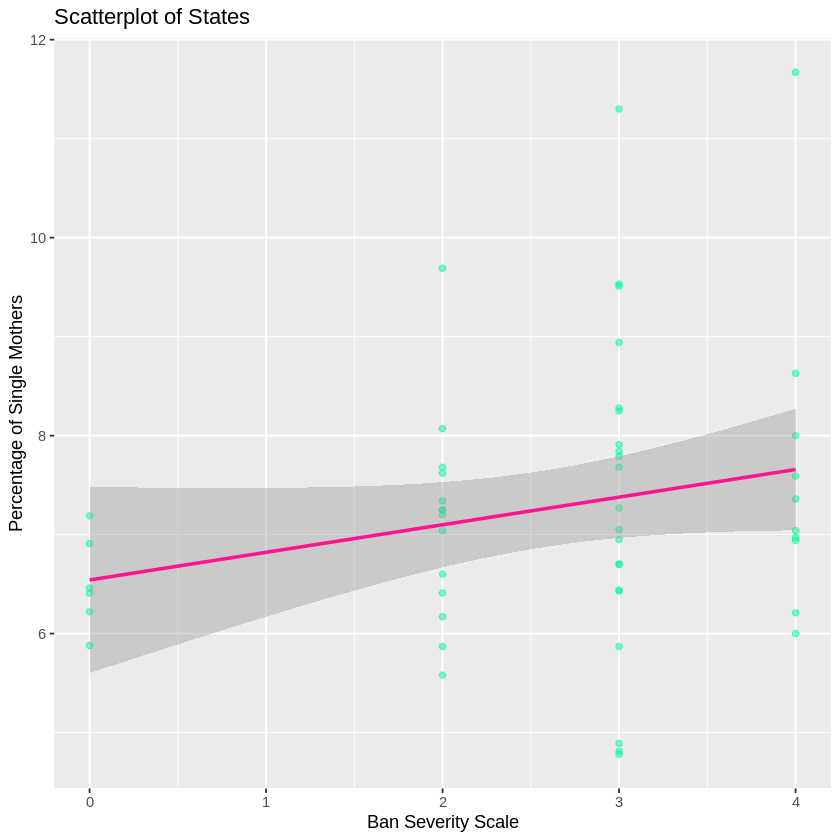

In [19]:
#Creating scatterplot 
paulplot <- ggplot(df_final, aes(x = ban_scale, y = percentage_single_mothers)) +
                 geom_point(alpha = 0.5, col = "mediumspringgreen", fill = "purple") + 
                    geom_smooth(method = "lm", colour = "deeppink")

#Viewing and labeling scatterplot
paulplot + labs (title="Scatterplot of States", 
                   x="Ban Severity Scale", y="Percentage of Single Mothers")

## Box Plot

Warning message:
“Removed 1 rows containing missing values (stat_boxplot).”Saving 6.67 x 6.67 in image
Warning message:
“Removed 1 rows containing missing values (stat_boxplot).”

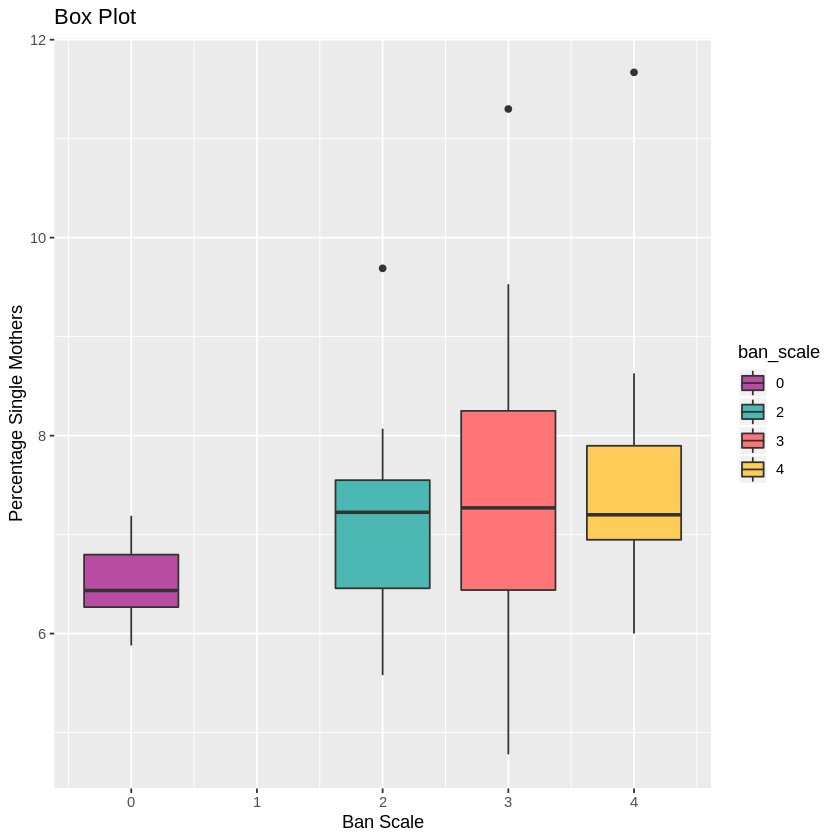

In [20]:
#Creating box plot
steyplot <- ggplot(df_final, aes(x = ban_scale, y = percentage_single_mothers, 
    group=ban_scale, fill = ban_scale)) +
        geom_boxplot(aes(fill = factor(ban_scale))) +
            scale_fill_manual(values=c("#b84ca3", "#4cb8b4", "#ff7477", "#ffcc58"))
 
#Viewing and labeling box plot
steyplot + labs(title="Box Plot", y="Percentage Single Mothers", x = "Ban Scale")
ggsave("steyplot.png")

## Normal Distribution Plots

In [26]:
#Installing and loading devtools
install.packages("devtools")
library("devtools")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [36]:
#This is the creation of a function called "shadenorm" which was copied from the following link
#https://www.r-bloggers.com/how-to-shade-under-a-normal-density-in-r/

shadenorm = function(below=NULL, above=NULL, pcts = c(0.025,0.975), mu=0, sig=1, numpts = 500, color = "gray", dens = 40,

                    justabove= FALSE, justbelow = FALSE, lines=FALSE,between=NULL,outside=NULL){

            
    if(is.null(between)){

         below = ifelse(is.null(below), qnorm(pcts[1],mu,sig), below)
         above = ifelse(is.null(above), qnorm(pcts[2],mu,sig), above)

    }


    if(is.null(outside)==FALSE){

         below = min(outside)
         above = max(outside)

    }

    lowlim = mu - 4*sig
    uplim  = mu + 4*sig

    x.grid = seq(lowlim,uplim, length= numpts)
    dens.all = dnorm(x.grid,mean=mu, sd = sig)

    if(lines==FALSE){

          plot(x.grid, dens.all, type="l", xlab="X", ylab="Density")

    }

    if(lines==TRUE){

          lines(x.grid,dens.all)

    }

    if(justabove==FALSE){

        x.below    = x.grid[x.grid<below]
        dens.below = dens.all[x.grid<below]
        polygon(c(x.below,rev(x.below)),c(rep(0,length(x.below)),rev(dens.below)),col=color,density=dens)

    }

    if(justbelow==FALSE){

        x.above    = x.grid[x.grid>above]
        dens.above = dens.all[x.grid>above]
        polygon(c(x.above,rev(x.above)),c(rep(0,length(x.above)),rev(dens.above)),col=color,density=dens)

    }

    if(is.null(between)==FALSE){
         
        from = min(between)
         to   = max(between)

         x.between    = x.grid[x.grid>from&x.grid<to]
         dens.between = dens.all[x.grid>from&x.grid<to]
         polygon(c(x.between,rev(x.between)),c(rep(0,length(x.between)),rev(dens.between)),col=color,density=dens)
    }
}

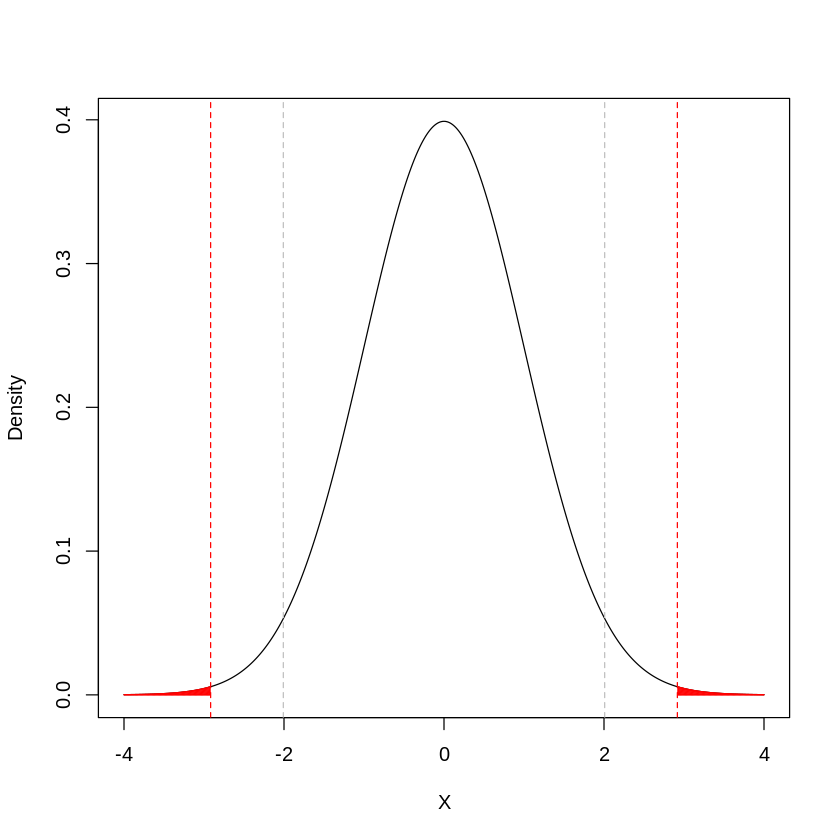

In [33]:
#This is a visual of t-test on any type of abortion ban

mean=0; sd=1; N=51
tcrit=qt(0.025, df=(N-1))

dum=seq(-3.5, 3.5, length=10^4)

color <- shadenorm(outside=c(-2.917, 2.917), col="red",dens=150)
abline(v=t_test_type$statistic,col='red', lty=2)
abline(v=-t_test_type$statistic,col='red', lty=2)
abline(v=tcrit, col='gray', lty=2)
abline(v=-tcrit, col='gray', lty=2)

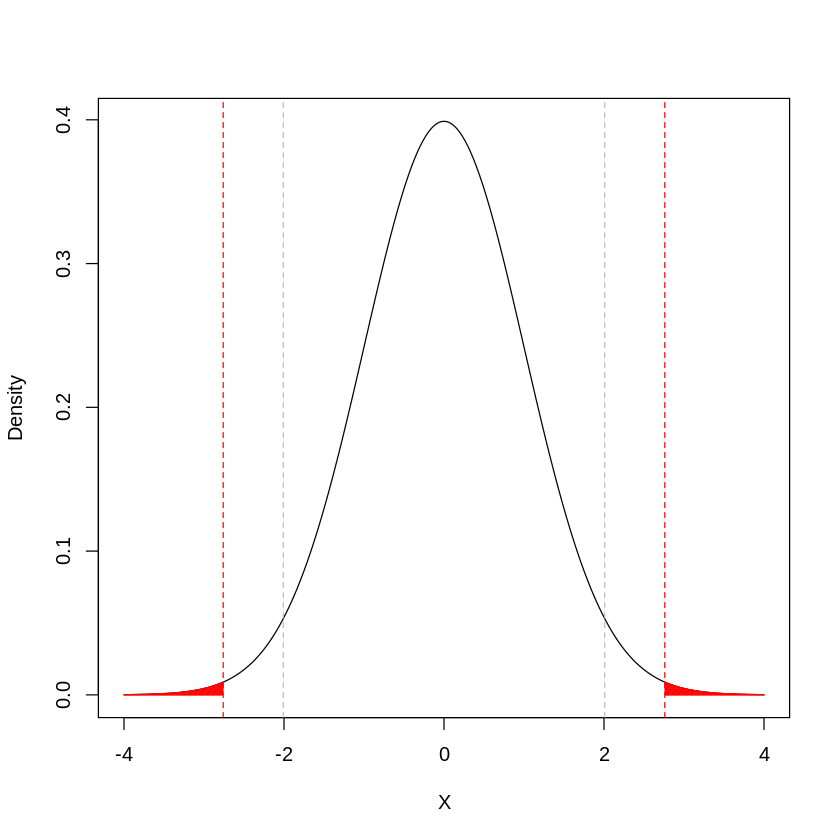

In [34]:
#This is a visual of t-test on any of the four types of abortion bans (type, time, method, & reason)
mean=0; sd=1; N=51
tcrit=qt(0.025, df=(N-1))

dum=seq(-3.5, 3.5, length=10^4)

color <- shadenorm(outside=c(-2.7601, 2.7601), col="red",dens=150)
abline(v=t_test_scale3$statistic,col='red', lty=2)
abline(v=-t_test_scale3$statistic,col='red', lty=2)
abline(v=tcrit, col='gray', lty=2)
abline(v=-tcrit, col='gray', lty=2)